In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as plt
import seaborn as sns; sns.set(style='white')
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from category_encoders import *
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
# conda install -c anaconda seaborn
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
#digits

(1797, 64)


In [3]:
digits['data']  

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

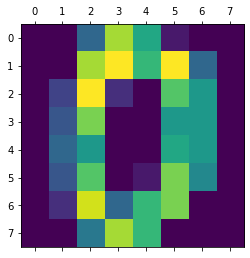

In [7]:
#plt.gray()
plt.matshow(digits.images[0]) 
plt.show()

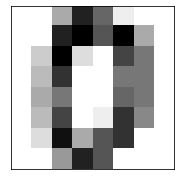

In [8]:
plt.figure(1, figsize=(3,3))
plt.imshow(digits.data[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
# присвоение значений X, y:
X = digits.data
y = digits.target
samples, features = X.shape

In [10]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8])

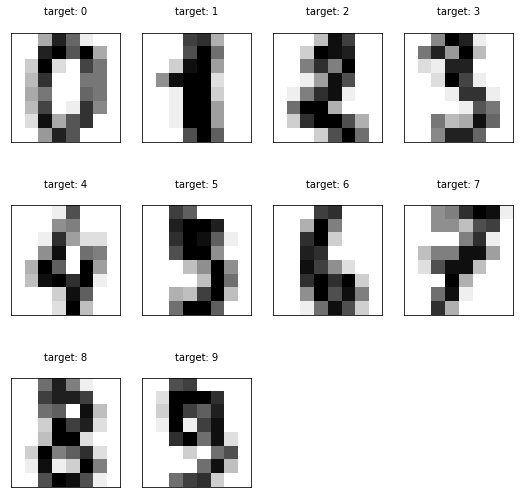

In [14]:
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.figure(1, figsize=(9, 9))
    plt.subplot(3, 4, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.title('target: %i\n' % label, fontsize = 10)
    #plt.show()

 Кластеризация и оценка качества

Алгоритмы кластеризации: AgglomerativeClustering и KMeans, разбиение массива X на 10 кластеров.

KMeans делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр n_init в конструкторе.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=10) # n_init=100
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
pr_km = kmeans.fit_predict(X)
pr_km.shape

(1797,)

In [20]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
pr_km_1 = kmeans.fit_predict(X)
f1_score(pr_km, pr_km_1, average='weighted')

0.11436485708354344

In [27]:
f1_score(y, pr_km, average='weighted')

0.00972699336644178

In [28]:
df = pd.DataFrame(np.array([pr_km, y]).T, columns=['predict', 'target'])
df['trf_pred'] = df['predict'] # происходит копирование в trf_pred номеров кластеров 
df

,predict,target,trf_pred
0,8,0,8
1,5,1,5
2,5,2,5
3,6,3,6
4,7,4,7
...,...,...,...
1792,2,9,2
1793,8,0,8
1794,5,8,5
1795,2,9,2


In [29]:
# Это соответсвие кластера номер 2 различным цифрам. 
# Самая частая будет присвоена этому номеру кластера. 
df[df.predict == 2]['target'].value_counts()

9    139
8     51
5     43
3     13
2      2
Name: target, dtype: int64

In [30]:
# Встречаемость различных цифр
df['target'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [31]:
for j in digits['target_names']:
    ind = df[df.predict == j]
    
    for i in range(len(ind.index)):
        df.loc[ind.index[i],('trf_pred')] = ind['target'].value_counts().index[0]
    print('target =', ind['target'].value_counts().index[0]) 
    print ('predict = ','\n', df[df.predict == j]['target'].value_counts())
    print ('f1_score = ',f1_score(df[df.predict == j]\
            ['trf_pred'], df[df.predict == j]['target'], average='weighted'), '\n')
df_km = df 

target = 2
predict =  
 2    147
1     24
8      3
Name: target, dtype: int64
f1_score =  0.9158878504672897 

target = 7
predict =  
 7    175
4      9
9      7
3      7
8      5
2      4
Name: target, dtype: int64
f1_score =  0.9162303664921466 

target = 9
predict =  
 9    139
8     51
5     43
3     13
2      2
Name: target, dtype: int64
f1_score =  0.718346253229974 

target = 6
predict =  
 6    177
8      2
1      2
5      1
Name: target, dtype: int64
f1_score =  0.9860724233983288 

target = 1
predict =  
 1    55
9    20
4     7
8     6
7     2
2     2
6     1
Name: target, dtype: int64
f1_score =  0.7432432432432433 

target = 8
predict =  
 8    101
1     99
2      8
3      7
4      3
9      2
7      2
6      2
Name: target, dtype: int64
f1_score =  0.6215384615384615 

target = 3
predict =  
 3    154
2     13
9      6
8      2
1      1
Name: target, dtype: int64
f1_score =  0.9333333333333335 

target = 4
predict =  
 4    162
5      2
0      1
Name: target, dtype: int64


In [32]:
df_km = df.copy() # сохранения df для дальнейшего анализа 

In [33]:
f1_sc_km = f1_score(df['target'], df['trf_pred'], average='weighted')
print ('f1_score KMeans = ', f1_sc_km)

f1_score KMeans =  0.7889032727514584


In [66]:
from sklearn.cluster import AgglomerativeClustering
digits = load_digits()
X = digits.data
y = digits.target
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [67]:
agg = clustering.fit_predict(X)


In [68]:
df = pd.DataFrame(np.array([agg, y]).T, columns=['predict', 'target'])
df['trf_pred'] = df['predict'] 
for j in digits['target_names']:
    ind = df[df.predict == j]
    for i in range(len(ind.index)):
        df.loc[ind.index[i],('trf_pred')] = ind['target'].value_counts().index[0]
    print('target =', ind['target'].value_counts().index[0]) 
    print ('predict = ','\n', df[df.predict == j]['target'].value_counts())
    print ('f1_score = ',f1_score(df[df.predict == j]\
            ['trf_pred'], df[df.predict == j]['target'], average='weighted'), '\n')
  

target = 5
predict =  
 5    179
9      2
Name: target, dtype: int64
f1_score =  0.9944444444444445 

target = 3
predict =  
 3    169
9    145
5      2
8      1
Name: target, dtype: int64
f1_score =  0.6954732510288066 

target = 2
predict =  
 2    166
1     27
8      4
Name: target, dtype: int64
f1_score =  0.9146005509641874 

target = 7
predict =  
 7    179
9     11
4      3
8      1
3      1
2      1
Name: target, dtype: int64
f1_score =  0.9546666666666667 

target = 8
predict =  
 8    165
3     13
2     10
9      2
6      1
Name: target, dtype: int64
f1_score =  0.9269662921348314 

target = 4
predict =  
 4    178
Name: target, dtype: int64
f1_score =  1.0 

target = 6
predict =  
 6    180
5      1
Name: target, dtype: int64
f1_score =  0.9972299168975068 

target = 0
predict =  
 0    178
Name: target, dtype: int64
f1_score =  1.0 

target = 1
predict =  
 1    59
9    20
8     1
Name: target, dtype: int64
f1_score =  0.8489208633093526 

target = 1
predict =  
 1    96
8 

In [69]:
df_aggl = df.copy() # сохранения df для дальнейшего анализа 


In [70]:
f1_sc_aggl = f1_score(df['target'], df['trf_pred'], average='weighted')
print ('f1_score Agglomer = ', f1_sc_aggl)

f1_score Agglomer =  0.8251164144851584


In [71]:
# выбор из всех X строк кластеру, соответсвующему цифре 1: 
df_a = pd.DataFrame(X)
df_a['trf_pred'] = df_aggl['trf_pred']
zz = np.array(np.mean( df_a[df_a.trf_pred == 1].drop('trf_pred', 1)))

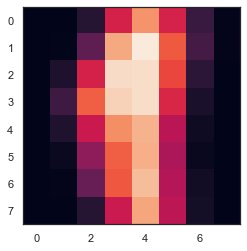

In [72]:
# визуализация:
plt.imshow(zz.reshape([8,8]));
plt.show()

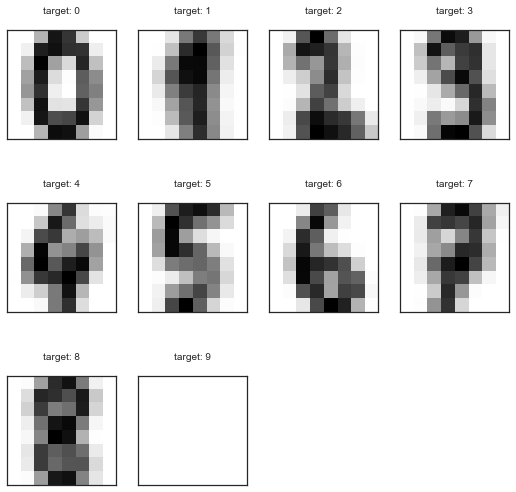

In [73]:
# Визуализация центров кластеров для AgglomerativeClustering:
for i in digits['target_names']:
    zz = np.array(np.mean( df_a[df_a.trf_pred == i].drop('trf_pred', 1)))
    plt.figure(1, figsize=(9, 9))
    plt.subplot(3, 4, i + 1)
    plt.imshow(zz.reshape([8,8]), cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.title('target: %i\n' % i, fontsize = 10)
    #plt.show()        

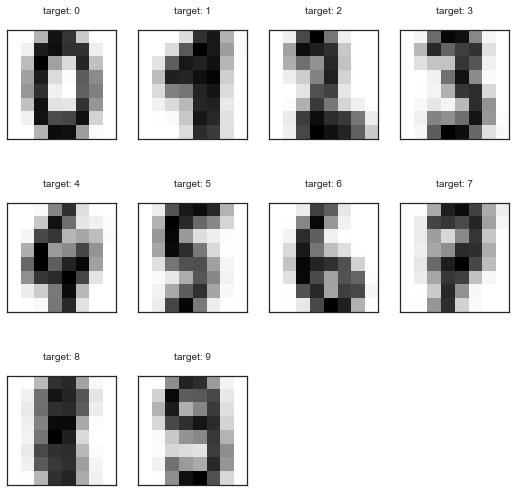

In [74]:
# Визуализация центров кластеров для KMeans:
# выбор из всех X строк кластеру, соответсвующему цифре 1: 
df_a = pd.DataFrame(X)
df_a['trf_pred'] = df_km['trf_pred']
for i in digits['target_names']:
    zz = np.array(np.mean( df_a[df_a.trf_pred == i].drop('trf_pred', 1)))
    plt.figure(1, figsize=(9, 9))
    plt.subplot(3, 4, i + 1)
    plt.imshow(zz.reshape([8,8]), cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.title('target: %i\n' % i, fontsize = 10)
    #plt.show()

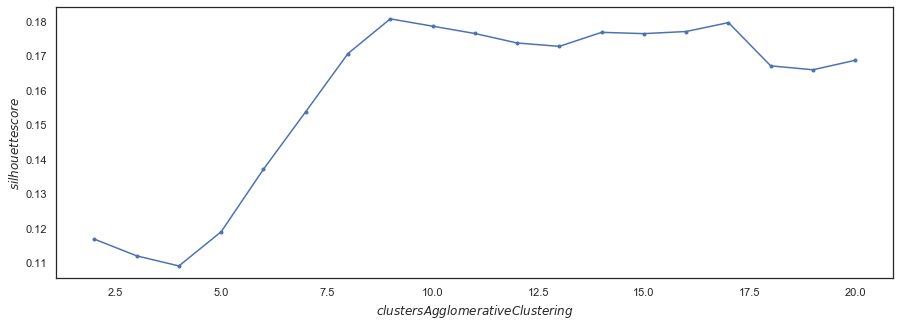

In [45]:
# Силует для AgglomerativeClustering, количесво кластеров от 2 до 20:
from sklearn import metrics
X = digits.data
y = digits.target
silhouette = []
for i in range(2, 21):
    clustering_model = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(X)
    labels = clustering_model.labels_
    metr = metrics.silhouette_score(X, labels, metric='euclidean')
    silhouette.append(metr)
plt.figure(1, figsize=(15, 5))    
plt.plot(range(2, 21), silhouette , marker='.');
plt.xlabel('$ clusters  AgglomerativeClustering $')
plt.ylabel('$silhouette score$');
plt.show()

In [46]:
clustering_model = AgglomerativeClustering(n_clusters=9, linkage='ward').fit(X)
labels = clustering_model.labels_
metr = metrics.silhouette_score(X, labels, metric='euclidean')
metr

0.18061975703867697

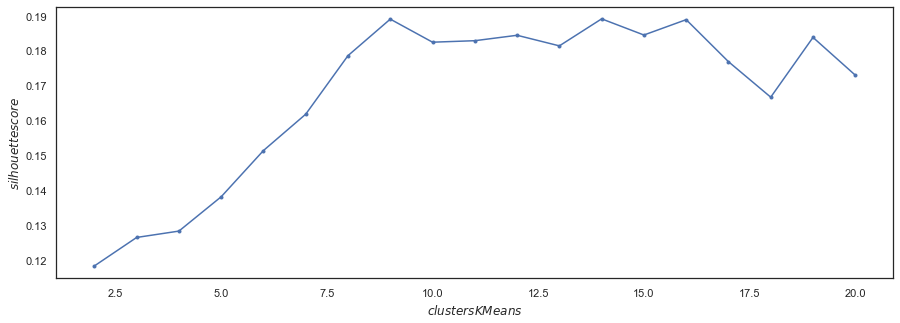

In [47]:
# Силует для KMeans, количесво кластеров от 2 до 20:
silhouette = []
for i in range(2, 21):
    kmeans_model = KMeans(n_clusters=i, n_init=10).fit(X)
    labels = kmeans_model.labels_
    metr = metrics.silhouette_score(X, labels, metric='euclidean')
    silhouette.append(metr)
plt.figure(1, figsize=(15, 5)) 
plt.plot(range(2, 21), silhouette , marker='.');
plt.xlabel('$ clusters  KMeans $')
plt.ylabel('$silhouette score$');
plt.show()

In [48]:
kmeans_model = KMeans(n_clusters=9, n_init=10).fit(X)
labels = kmeans_model.labels_
metr = metrics.silhouette_score(X, labels, metric='euclidean')
metr

0.18937115962847498

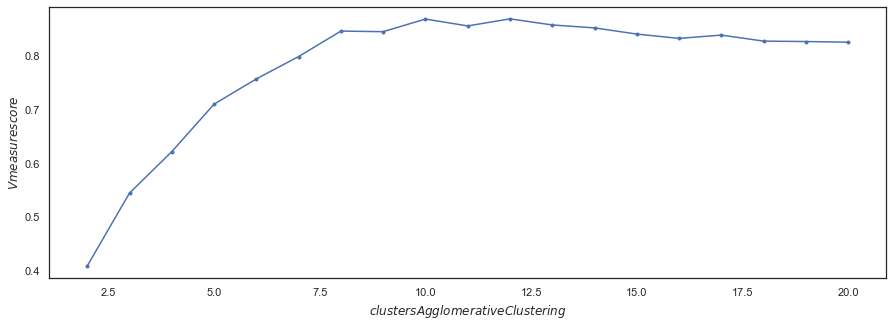

In [49]:
# 𝑉 -мера для AgglomerativeClustering, количесво кластеров от 2 до 20:
labels_true = y
v_measure = []
for i in range(2, 21):
    clustering_model = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(X)
    labels = clustering_model.labels_
    metrV = metrics.v_measure_score(labels_true, labels)
    v_measure.append(metrV)
plt.figure(1, figsize=(15, 5))    
plt.plot(range(2, 21), v_measure , marker='.');
plt.xlabel('$ clusters  AgglomerativeClustering $')
plt.ylabel('$V measure score$');
plt.show()

In [50]:
clustering_model = AgglomerativeClustering(n_clusters=12, linkage='ward').fit(X)
labels = clustering_model.labels_
metrV = metrics.v_measure_score(labels_true, labels)
metrV

0.86854875186737

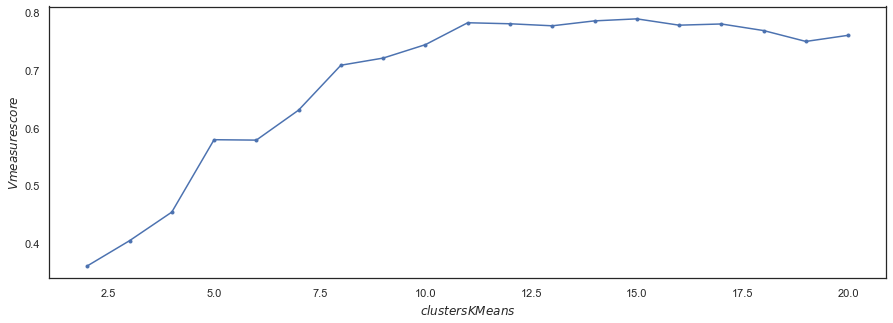

In [52]:
# 𝑉 -мера для KMeans, количесво кластеров от 2 до 20:
labels_true = y
v_measure = []
for i in range(2, 21):
    kmeans_model = KMeans(n_clusters=i, n_init=10).fit(X)
    labels = kmeans_model.labels_
    metrV = metrics.v_measure_score(labels_true, labels)
    v_measure.append(metrV)
plt.figure(1, figsize=(15, 5))    
plt.plot(range(2, 21), v_measure , marker='.');
plt.xlabel('$ clusters  KMeans $')
plt.ylabel('$V measure score$');
plt.show()

In [53]:
kmeans_model = KMeans(n_clusters=12, n_init=10).fit(X)
labels = kmeans_model.labels_
metrV = metrics.v_measure_score(labels_true, labels)
metrV

0.772290207016405

In [61]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.cluster import v_measure_score
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

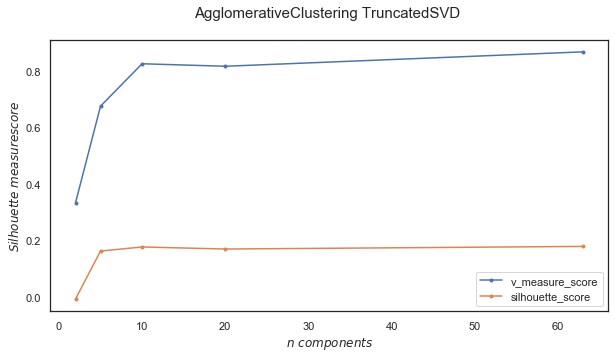

In [62]:
# Иерархическая кластеризация преобразованных данных, число кластеров - 10.
# Графики значений силуэта и  𝑉 -меры.
labels_true = y
v_measure = []
silhouette = []
n_comp = (2, 5, 10, 20, 63)
for n in n_comp:
    svd = TruncatedSVD(n_components=n,random_state=0)
    X_svd = svd.fit_transform(X)
    
    clustering_model = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(X_svd) 
    labels = clustering_model.labels_
    metr_s = metrics.silhouette_score(X, labels, metric='euclidean') 
    silhouette.append(metr_s)
    metr_V = metrics.v_measure_score(labels_true, labels)
    v_measure.append(metr_V)
     
fig, ax = plt.subplots()    
ax.plot(n_comp, v_measure, label = 'v_measure_score', marker='.')
ax.plot(n_comp, silhouette, label = 'silhouette_score', marker='.')
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.xlabel('$ n\\  components $')
plt.ylabel('$ Silhouette\\   measure score$');    
plt.title('AgglomerativeClustering TruncatedSVD \n', fontsize = 15)
plt.show()            

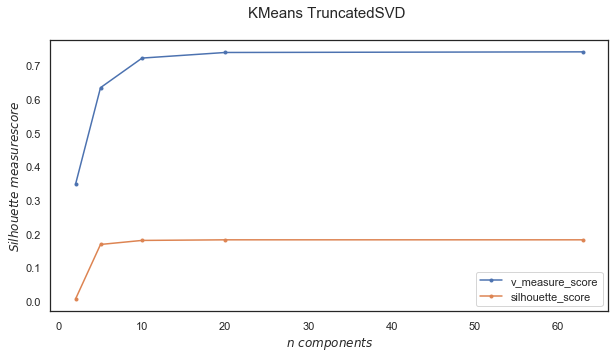

In [65]:
# KMeans кластеризация преобразованных данных, число кластеров - 10.
# Графики значений силуэта и  𝑉 -меры.
labels_true = y
v_measure = []
silhouette = []
n_comp = (2, 5, 10, 20, 63)
for n in n_comp:
    svd = TruncatedSVD(n_components=n,random_state=0)
    X_svd = svd.fit_transform(X)
    
    kmeans_model = KMeans(n_clusters=10, n_init=10).fit(X_svd)
    labels = kmeans_model.labels_
    metr_s = metrics.silhouette_score(X, labels, metric='euclidean')
    silhouette.append(metr_s)
    metr_V = metrics.v_measure_score(labels_true, labels)
    v_measure.append(metr_V)
   
fig, ax = plt.subplots()    
ax.plot(n_comp, v_measure, label = 'v_measure_score', marker='.')
ax.plot(n_comp, silhouette, label = 'silhouette_score', marker='.')
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.xlabel('$ n\\  components $')
plt.ylabel('$ Silhouette\\   measure score$');    
plt.title('KMeans TruncatedSVD \n', fontsize = 15)
plt.show()            

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=17)
tsne


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=17, verbose=0)

In [56]:
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(1797, 2)

In [57]:
X_tsne

array([[ -5.6107125,  57.145626 ],
       [ 20.054407 , -19.655502 ],
       [-11.964548 , -27.287413 ],
       ...,
       [ -3.1735392, -14.183256 ],
       [-17.891619 ,   8.02904  ],
       [-10.266273 , -15.676453 ]], dtype=float32)

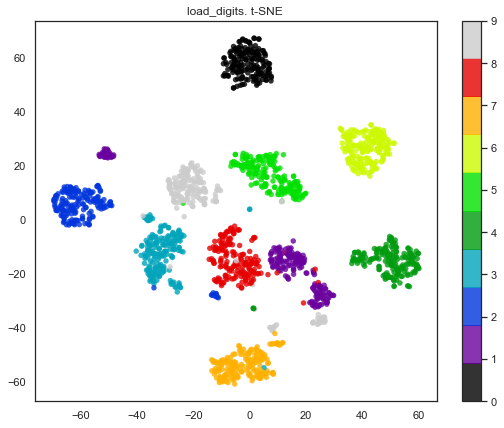

In [58]:

plt.figure(figsize=(9, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.8, s=30,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('load_digits. t-SNE ')
plt.show()

In [59]:
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
clust_X_tsne = clustering.fit_predict(X_tsne)
metr_s = metrics.silhouette_score(X, clust_X_tsne, metric='euclidean')
metr_V = metrics.v_measure_score(y, clust_X_tsne)
print('silhouette_clust_X_tsne = ', metr_s)
print('v_measure_clust_X_tsne =', metr_V, '\n')

silhouette_clust_X_tsne =  0.16368592362438994
v_measure_clust_X_tsne = 0.9224505051266269 



In [60]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans_X_tsne = kmeans.fit_predict(X_tsne)
metr_s = metrics.silhouette_score(X, kmeans_X_tsne, metric='euclidean')
metr_V = metrics.v_measure_score(y, kmeans_X_tsne)
print('silhouette_kmeans_X_tsne = ', metr_s)
print('v_measure_kmeans_X_tsne =', metr_V, '\n')

silhouette_kmeans_X_tsne =  0.16362265794446332
v_measure_kmeans_X_tsne = 0.9147606543039944 

